In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

print (X_numpy, y_numpy )

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

print (X, y)

n_samples, n_features = X.shape

print (n_samples, n_features)

[[-1.3474603 ]
 [ 0.3523434 ]
 [ 0.9546986 ]
 [ 0.03592805]
 [ 0.04800625]
 [ 0.04860301]
 [ 0.72334161]
 [ 0.80208661]
 [-1.14379857]
 [ 0.17941071]
 [-0.64770677]
 [-1.11281215]
 [-1.58457724]
 [-0.08798693]
 [ 2.47658416]
 [-0.7322647 ]
 [ 1.54697933]
 [-0.13070464]
 [ 0.30044554]
 [-0.9443686 ]
 [-0.30296397]
 [-0.37444492]
 [-1.15681626]
 [ 0.59857517]
 [-2.37977527]
 [-0.60768369]
 [ 0.54245131]
 [ 2.02240507]
 [ 0.04613557]
 [ 0.52324766]
 [ 0.29714121]
 [-1.54292905]
 [ 1.69235772]
 [ 0.20931349]
 [-0.41830152]
 [ 0.87084178]
 [-1.14747663]
 [-0.17521053]
 [-0.9617768 ]
 [ 0.1886462 ]
 [ 1.20200259]
 [ 1.99008302]
 [-1.36096559]
 [-0.05455871]
 [ 1.16418756]
 [-1.45553433]
 [ 0.01908996]
 [-0.77873992]
 [ 0.03754749]
 [-0.34610187]
 [-0.65122583]
 [ 0.15846954]
 [-1.20894816]
 [-0.64764453]
 [ 0.91484096]
 [-1.84087587]
 [ 0.49995133]
 [ 1.27181862]
 [ 0.69359851]
 [ 0.55618522]
 [ 0.4250724 ]
 [-1.09712188]
 [-0.5648753 ]
 [ 0.35099715]
 [ 0.83783635]
 [ 0.05443274]
 [-0.00936

In [3]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
print (model)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


epoch: 10, loss = 4041.6665
epoch: 20, loss = 2847.5156
epoch: 30, loss = 2033.8508
epoch: 40, loss = 1479.3148
epoch: 50, loss = 1101.3011
epoch: 60, loss = 843.5628
epoch: 70, loss = 667.7944
epoch: 80, loss = 547.9016
epoch: 90, loss = 466.1057
epoch: 100, loss = 410.2902


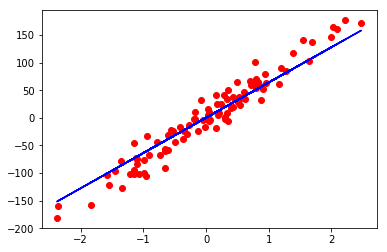

In [4]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()